## BEEM011 Exercise 5: Week 7

Multiple Linear Regression

Amy Binner and Eva Poen

Answers

## Useful R code

#### INSTALLING A PACKAGE AND ADDING TO LIBRARY

install.packages(“MASS”)

library(MASS)

data(“Boston”)

#### LINEAR REGRESSION

reg <- lm(y~x1+x2,data =mydata)

#### LINEAR REGRESSION ON ALL VARIABLES IN DATASET

reg <- lm(y ~., data = mydata)

#### ROBUST STANDARD ERRORS

coeftest(reg, vcov. = vcovHC, type ="HC1")

#### VIEW COLUMNS IN DATASET
head(mydata)

#### DROP COLUMN i FROM A DATASET

mydata = mydata[ , -i]

#### FOR LOOPS

In [2]:
# You can create a for loop when you want to automate a process 
# Below is a for loop which for the numbers 1 to 3 prints 2 times the number plus one
# To do this we use a variable j which changes value in each round of the loop

# set up a variable to store the calculation - 
# you can do this using list() to create an empty list, or {} to create an empty vector
x <- list()
x

list()

In [3]:
# start a for loop
for (j in 1:3) {
        x[j] <- 3*j + 1
        }
x

[[1]]
[1] 4

[[2]]
[1] 7

[[3]]
[1] 10

#### Example

In [4]:
# Now let's create a for loop that prints the elements of a vector, z, but drops the jth element each time
# To drop the jth element of z we use z[-j]

z <- c(2,4,3,9)
z

[1] 2 4 3 9

In [7]:
for (j in 1:4) {
        print(z[-j])
        cat("\n Dropped element", j, " is:", z[j], "\n")
        }

# Notice that there are four iterations in the loop, j=1,2,3,4

[1] 4 3 9
Dropped element 1  is: 2[1] 2 3 9
Dropped element 2  is: 4[1] 2 4 9
Dropped element 3  is: 3[1] 2 4 3
Dropped element 4  is: 9

In [8]:
#### Example 2

n <- c("H","e","l", "l", "o")
n 

[1] "H" "e" "l" "l" "o"

In [11]:
for (j in 5:1) {
        cat(n[j], "\n")
        }

o 
l 
l 
e 
H 


# Question 1 a)

In this empirical exercise, you will work with the Boston Housing data set which contains 506 observations on housing values in suburbs of Boston. 

Boston comes with the package MASS which you need to install and load into your library. 

Summarize the dataset by looking at the distribution of each variable. You can use the summary() or head() function to get an overview of the dataset. 

In [12]:
## Edit the code below 
# Header: Exercise 5 
# Author: 
# Date:
# Candidate number:

# Install MASS package and load the Boston data
# if this does not work try installing via the powershell terminal using 
# conda install -c conda-forge r-MASS

#install.packages("MASS")
library(MASS)
data("Boston")

# Summarize the data using summary
summary(Boston)


Warning message:
"package 'MASS' was built under R version 3.6.3"

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [13]:
# Summarise the data using head
s2 <- head(Boston)
s2

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## 1 b i)	

Estimate a simple linear regression model that explains the median house value of districts in thousands of dollars, medv, by the percent of households with low socioeconomic status, lstat, and a constant.  This type of model is called a hedonic price model.

Save the model to reg1. 

Print a coefficient summary to the console that reports robust standard errors.

#### Remember - it is always better to use robust standard errors as results are still valid when errors are homoskedastic.

In [14]:
# Estimate a simple linear regression model
reg1 <- lm(medv~lstat, data= Boston)
summary(reg1) # Remember this is homoskedasticity only standard errors


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [15]:
# Print a coefficient summary with robust standard errors
library(AER)
coeftest(reg1, vcov.= vcovHC, type="HC1")
# Save robust standard errors 
sereg1 <- vcovHC(reg1, vcov.=vcovHC, type = "HC1")

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 34.553841   0.754199  45.815 < 2.2e-16 ***
lstat       -0.950049   0.049605 -19.152 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# 1 b ii)

How do you interpret the regression results?

What do you notice about the standard errors?

#### Enter your answer here

The results suggest that medv and lstat are negatively linearly dependent. 

A 1-percentage point increase in lstat is associated with $950 decline in median house value of districts in Boston. 

The robust standard errors are larger than the homoskedasticity only standard errors.

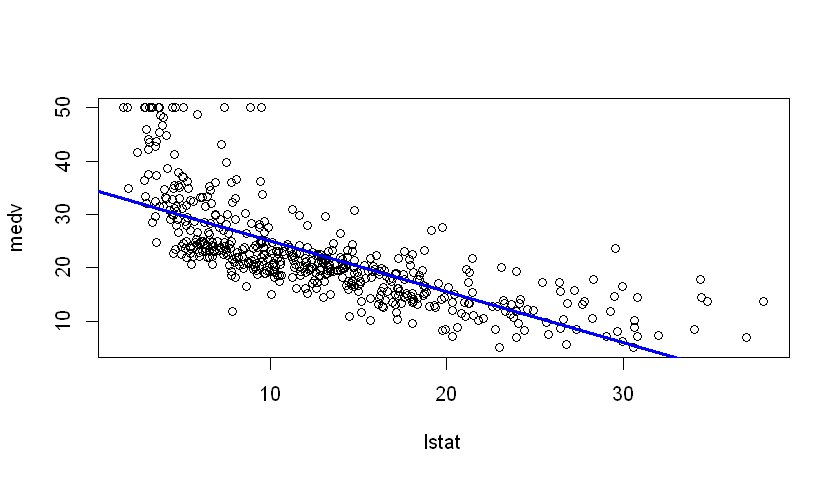

In [18]:
# resizing the plot window
options(repr.plot.width=7, repr.plot.height=4)

# Plotting the data and the estimated regression line
plot(medv~lstat, data = Boston)
abline(reg1, col = "blue", lwd = 3)

# 1 c)

Now lets expand the approach by adding additional regressors to the model and reestimating it. 

Regress the median housing value in a district, medv, on the average age of the buildings, age, the per-capita crime rate, crim, the percentage of individuals with low socioeconomic status, lstat, and a constant. Put differently, estimate the model and save it to reg2.

Print the summary and a coefficient summary with robust standard errors.

In [19]:
# Estimate a multiple linear regression model

reg2 <- lm(medv ~ lstat + crim + age, data = Boston)

# Print the summary
summary(reg2)


Call:
lm(formula = medv ~ lstat + crim + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.133  -3.848  -1.380   1.970  23.644 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.82804    0.74774  43.903  < 2e-16 ***
lstat       -0.99409    0.05075 -19.587  < 2e-16 ***
crim        -0.08262    0.03594  -2.299  0.02193 *  
age          0.03765    0.01225   3.074  0.00223 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.147 on 502 degrees of freedom
Multiple R-squared:  0.5559,	Adjusted R-squared:  0.5533 
F-statistic: 209.5 on 3 and 502 DF,  p-value: < 2.2e-16


In [20]:
# Print coefficients with robust standard errors
coeftest(reg2, vcov. = vcovHC, type= "HC1")
# saving robust standard errors (for stargazer table)
sereg2 <- vcovHC(reg2, type = "HC1")


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 32.828045   0.746060  44.0019 < 2.2e-16 ***
lstat       -0.994091   0.081360 -12.2185 < 2.2e-16 ***
crim        -0.082622   0.028295  -2.9200  0.003658 ** 
age          0.037647   0.016633   2.2634  0.024035 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [21]:
library(stargazer)
stargazer(reg1, reg2, type = "text", se = list(sereg1, sereg2))


Please cite as: 

 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




                                   Dependent variable:               
                    -------------------------------------------------
                                          medv                       
                              (1)                      (2)           
---------------------------------------------------------------------
lstat                      -0.950***                -0.994***        
                            (-0.035)                 (-0.013)        
                                                                     
crim                                                -0.083***        
                                                     (0.004)         
                                                                     
age                                                  0.038***        
                                                     (-0.005)        
                                                                     
Constant           

#### Results 

A 1-percentage point increase in lstat is associated with $994 decline in median house value of districts in Boston.

The coefficient for lstat has increased (in magnitude), suggesting that perhaps there may an omitted variable(s) in the previous model that creates bias in the estimated coefficient. 

This could imply that the correlation between lstat and the unobserved relevant variable is negative and the correlation between the medv and the omitted variable is positive (or the correlation between lstat and the omitted variable is positive, but the relationship between medv and the omitted variable is negative). 

One possible explanation could be that as building age increases as the share lower status of the population (percent) increases and that building age increases property prices (assuming fixed quality) as people value period features.

### Correlation

You can calculate the pairwise correlation coefficient using the function cor()

In [22]:
# Example
cor(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


In [ ]:
# But we only want to see a subset of the variables

cor(Boston[,c(1,7,13,14)]) # You can use column numbers

In [23]:
cor(Boston[,c("crim","age","lstat","medv")]) # Or you can use the column names in double quotes

,crim,age,lstat,medv
crim,1.0000000,0.3527343,0.4556215,-0.3883046
age,0.3527343,1.0000000,0.6023385,-0.3769546
lstat,0.4556215,0.6023385,1.0000000,-0.7376627
medv,-0.3883046,-0.3769546,-0.7376627,1.0000000


## 1 d)

As has been discussed in lecture, it is not meaningful to use  R-sq ($R^2$) when comparing regression models with a different number of regressors. Instead, the adjusted R-sq ($\bar{R}^2$) should be used.  

Use the model object to compute the correction factor, $ CF =  {(n-1)\over(n-k-1)}$ where n is the number of observations and k is the number of regressors, excluding the intercept. 
Save it to CF. 

Use summary() to obtain $R^2$ and ($\bar{R}^2$)
for reg2. 

Create a boolean variable called validate that checks whether 
$\bar{R}^2 =1-(1-R^2 ) \times CF$.

In [33]:
# Look at the reg2$model object, 
# notice that it contains the model data
reg2$model

medv,lstat,crim,age
24.0,4.98,0.00632,65.2
21.6,9.14,0.02731,78.9
34.7,4.03,0.02729,61.1
33.4,2.94,0.03237,45.8
36.2,5.33,0.06905,54.2
28.7,5.21,0.02985,58.7
22.9,12.43,0.08829,66.6
27.1,19.15,0.14455,96.1
16.5,29.93,0.21124,100.0
18.9,17.10,0.17004,85.9


In [34]:
# Calculate n, k and CF
n <- nrow(reg2$model)
n

[1] 506

In [35]:
k <- ncol(reg2$model)-1
k

[1] 3

In [36]:
CF <- (n-1)/(n-k-1)
CF

[1] 1.005976

In [ ]:
summary(reg2)

In [37]:
r2 <- summary(reg2)$r.squared
adjr2 <-summary(reg2)$adj.r.squared

In [38]:
validate <- (adjr2 == 1 - (1-r2)*CF)

# Print the value of validate
validate

[1] TRUE

## 1 e)

Regress medv on all remaining variables that you find in the Boston data set. To do this you don't need to type all of the variable names, instead you can use a dot e.g. lm(y ~., data = mydata).

Obtain a heteroskedasticity-robust summary of the coefficients. 

In [24]:
# Run a regression of medv on all remaining variables 
# in the Boston data set
full_mod <- lm(medv ~., data = Boston)

# obtain a robust summary of the coefficients
coeftest(full_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  3.6459e+01  8.0010e+00  4.5569 6.558e-06 ***
crim        -1.0801e-01  2.8944e-02 -3.7317 0.0002124 ***
zn           4.6420e-02  1.3765e-02  3.3722 0.0008043 ***
indus        2.0559e-02  5.0380e-02  0.4081 0.6834006    
chas         2.6867e+00  1.2938e+00  2.0766 0.0383600 *  
nox         -1.7767e+01  3.7858e+00 -4.6930 3.495e-06 ***
rm           3.8099e+00  8.4490e-01  4.5093 8.142e-06 ***
age          6.9222e-04  1.6464e-02  0.0420 0.9664807    
dis         -1.4756e+00  2.1471e-01 -6.8724 1.918e-11 ***
rad          3.0605e-01  6.1436e-02  4.9816 8.744e-07 ***
tax         -1.2335e-02  2.6909e-03 -4.5838 5.798e-06 ***
ptratio     -9.5275e-01  1.1744e-01 -8.1126 3.985e-15 ***
black        9.3117e-03  2.6786e-03  3.4763 0.0005534 ***
lstat       -5.2476e-01  9.9650e-02 -5.2660 2.087e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [25]:
sefull_mod <- vcovHC(full_mod, type = "HC1")

# what is the R^2 of the model?
print("full model adj R")
round(summary(full_mod)$adj.r.squared, 3)  ## highest adj R-sq.
print("previous model adj R")
round(summary(reg2)$adj.r.squared, 3)  ## highest adj R-sq.

[1] "full model adj R"


[1] 0.734

[1] "previous model adj R"


[1] 0.553

In [28]:
library(stargazer)
stargazer(reg2, full_mod, type = "text", se = list(sereg2, sefull_mod))


                                   Dependent variable:                
                    --------------------------------------------------
                                           medv                       
                              (1)                       (2)           
----------------------------------------------------------------------
lstat                      -0.994***                  -0.525          
                            (-0.013)                 (-0.469)         
                                                                      
crim                       -0.083***                 -0.108***        
                            (0.004)                  (-0.042)         
                                                                      
zn                                                     0.046          
                                                      (0.048)         
                                                                      
indus

## 1 e ii) 

What can you say about the  adjusted R^2 of the large regression model? Does this model improve on the previous one? 

#### Write your answers here

Notice that the smallest p-value is associated with the coefficient on ptratio, the pupil-teacher ratio by town. It is conceivable that quality of the schooling district is an important location factor. According to the adj. R2 , the full model does better than the model dealt with in the previous exercises which use a smaller subset of the variables as regressors.

Omitted variable bias.

## 1 f) 

Now, you have to estimate several models, each time dropping one of the explanatory variables used in the large regression model in (e) and compare the adjusted R-sq, $\bar{R}^2$. 

Start by estimating a model where one variable, e.g. lstat, is excluded from the explanatory variables. 

Next, access the $\bar{R}^2$ of this model. Repeat Steps 1 and 2 for all explanatory variables used in the full regression model. Save the $\bar{R}^2$.  You can do this one regression at a time but it is more efficient to write a loop that automates the process.

Save the model with the highest improvement in $\bar{R}^2$ to reg4. 

Which model yields the highest $\bar{R}^2$?

In [30]:
# This solution is a bit technical but efficient
# Alternatively, you can do this one regression at a time. 

# loop estimation of models dropping one column at a time
# define a list ls where you will save the adjusted r squared values
ls <- list()

# next begin the for loop, there are 13 regressors in total
for (i in 1:13) {
  d <- Boston[, -i] # -i means that the ith column/regressor is excluded from the Boston data
  # save each adj. R^2 as a list entry in ls
  ls[i] <- summary(lm(medv ~., data=d))$adj.r.squared 
}


round(as.numeric(ls),3)

[1] 0.728 0.728 0.734 0.729 0.723 0.689 0.734 0.705 0.723 0.729 0.706 0.728
[13] 0.677

In [31]:
# assign variable names to the list entries
names(ls) <- names(Boston[, 1:13]) 

# select the variable whose omission leads to the highest improvement in adj. R^2
which.max(ls) # 7th column this is "age"

age 
  7

In [32]:
# hence a model that fits the data better is
reg3 <- lm(medv ~., data = Boston[, -7])
summary(reg3)


Call:
lm(formula = medv ~ ., data = Boston[, -7])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

#### Answer

The best model seems to suggest that we need to drop age as a regressor. Notice that this model fits the data better than the full model and does better than all other models which include 12 of the available set of 13 regressors, in terms of adj. R-sq. Note, however, that the increase in adj. R2 is very small and that the model is not the best of all conceivable models. We will discuss this issue in detail when we deal with nonlinear functions in Week 7. 

In [ ]:
## DO NOT EDIT
# This section formats your answers for marking
answers = c(s1, s2, reg1, reg2, full_mod, reg3, validate)